### Conditions description:
<ul>
    <li>C1 = low interference, easy search -> 'SearchDomain' diff, 'SearchLevel' easy</li>
    <li>C2 = low interference, hard search -> 'SearchDomain' diff, 'SearchLevel' hard</li>
    <li>C3 = high interference, easy search -> 'SearchDomain' same, 'SearchLevel' easy</li>
    <li>C4 = high interference, hard search -> 'SearchDomain' same, 'SearchLevel' hard</li>
</ul>

Questions/Notes: 
<br> Fix run 8 data.
<br> Cue and probe always same stimuli category?

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nibabel as nib
import nilearn
from nilearn.plotting import view_img, glass_brain, plot_stat_map
from bids import BIDSLayout, BIDSValidator

/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load fMRI data

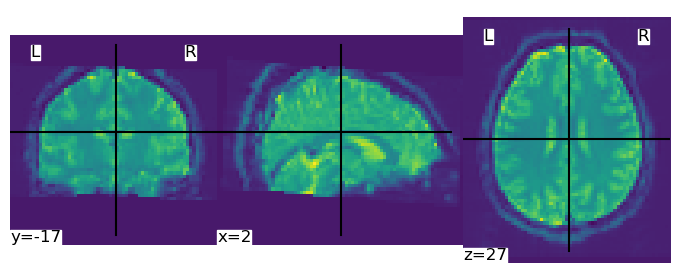

In [2]:
from nilearn.image import concat_imgs, mean_img, resample_img
from nilearn import plotting

# First run data
img = nib.load("DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz")
path = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
fmri_img = concat_imgs(path)

# Obtain mean image from first participant fmri session
# 'mean_img' will be useful to set a background to plot contrasts against
mean_img = mean_img(fmri_img)
plotting.plot_img(mean_img)
plt.show()

# Read scanning info from file 
# Important, get 'tr' information
#header = img.header
#print(header.get_zooms()) # tr=2
tr = 2
#print(header)

In [3]:
#path8 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-08_bold_space-MNI152NLin2009cAsym_preproc.nii"

#fmri8 = nib.load(path8)



In [4]:
path1 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path2 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path3 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path4 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-04_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path5 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-05_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path6 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-06_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path7 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-07_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path8 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-08_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"

fmri_img = [concat_imgs(path1, auto_resample=True),
            concat_imgs(path2, auto_resample=True),
            concat_imgs(path3, auto_resample=True),
            concat_imgs(path4, auto_resample=True),
            concat_imgs(path5, auto_resample=True),
            concat_imgs(path6, auto_resample=True),
            concat_imgs(path7, auto_resample=True),
            concat_imgs(path8, auto_resample=True)]
           
affine, shape = fmri_img[0].affine, fmri_img[0].shape


# Resampling images to fit same affine
# Though, I think they already have the same affine
fmri_img[1] = resample_img(fmri_img[1], affine, shape[:3])
fmri_img[2] = resample_img(fmri_img[2], affine, shape[:3])
fmri_img[3] = resample_img(fmri_img[3], affine, shape[:3])
fmri_img[4] = resample_img(fmri_img[4], affine, shape[:3])
fmri_img[5] = resample_img(fmri_img[5], affine, shape[:3])
fmri_img[6] = resample_img(fmri_img[6], affine, shape[:3])
print('Resampling done.')
fmri_img[7] = resample_img(fmri_img[7], affine, shape[:3])
print('8')

Resampling done.
8


In [5]:
print(len(fmri_img))
#mean_image = mean_img(fmri_img[0])

8


## Load events (task/behavioral data)

In [6]:
#df[['memitem1', 'targstim', 'probe']].head(25)

In [7]:
# Path to behavioral data file
e_path1 = "DistractWM2/behavioral_data/DistractWM_scanner_shorter_newStim102.txt"

# Reformat data to csv file
data2 = pd.read_csv(e_path1, sep=" ")
path2 = "data2.csv"
data2.to_csv(path2, sep='\t')

# Load events data in panda dataframe(df)
df = pd.read_csv("data2.csv", sep='\t') 
df1 = df[df["block"] == 1].reset_index()
df2 = df[df["block"] == 2].reset_index()
df3 = df[df["block"] == 3].reset_index()
df4 = df[df["block"] == 4].reset_index()
df5 = df[df["block"] == 5].reset_index()
df6 = df[df["block"] == 6].reset_index()
df7 = df[df["block"] == 7].reset_index()
df8 = df[df["block"] == 8].reset_index()
total_dfs = [df1, df2, df3, df4, df5, df6, df7, df8]

# Create empty DataFrame (one per run)
events1 = pd.DataFrame()
events2 = pd.DataFrame()
events3 = pd.DataFrame()
events4 = pd.DataFrame()
events5 = pd.DataFrame()
events6 = pd.DataFrame()
events7 = pd.DataFrame()
events8 = pd.DataFrame()
total_events = [events1, events2, events3, events4, events5, events6, events7, events8]

def extracting_events_info(data_df, events):
    
    #num_of_trials = df["block"].size
    # Process data for 'events df'
    for x in range(24):

        # Formating data for 'cue', 'probe' and 'visual search' events
        cue_onset = data_df["cueShow"][x] # data_df["scannerStart"] - 
        probe_onset = data_df["probeStart"][x] # data_df["scannerStart"] - 
        vs_onset = data_df["searchStart"][x] # data_df["scannerStart"] - 

        probe_duration = data_df["ProbeDuration"][x]
        vs_duration = data_df["SearchDuration"][x]
        cue_duration = data_df["CueDuration"][x]

        # Useful vars to sort vs category
        probe = data_df["targstim"][x]
        probe_interference = data_df["SearchDomain"][x]
        probe_att_d = data_df["SearchLevel"][x]
    
        # Categorize each run according to 'type of stimuli', 'level of interference' and 'attentional demand'
        if((probe[:5] == "House") and (probe_interference == "diff") and (probe_att_d == "easy")):
            cue_type = "house_cue"
            probe_type = "house_probe" #"probe_house_c1"
            visual_search_type = "vs_face_c1"
        elif((probe[:5] != "House") and (probe_interference == "diff") and (probe_att_d == "easy")):
            cue_type = "face_cue"
            probe_type = "face_probe" #"probe_face_c1"
            visual_search_type = "vs_house_c1"
        elif((probe[:5] == "House") and (probe_interference == "diff") and (probe_att_d == "hard")):#
            cue_type = "house_cue"
            probe_type = "house_probe" #"probe_house_c2"
            visual_search_type = "vs_face_c2"
        elif((probe[:5] != "House") and (probe_interference == "diff") and (probe_att_d == "hard")):
            cue_type = "face_cue"
            probe_type = "face_probe" #"probe_face_c2"
            visual_search_type = "vs_house_c2"
        elif((probe[:5] == "House") and (probe_interference == "same") and (probe_att_d == "easy")):
            cue_type = "house_cue"
            probe_type = "house_probe" #"probe_house_c3"
            visual_search_type = "vs_house_c3"
        elif((probe[:5] != "House") and (probe_interference == "same") and (probe_att_d == "easy")):
            cue_type = "face_cue"
            probe_type = "face_probe" #"probe_face_c3"
            visual_search_type = "vs_face_c3"
        elif((probe[:5] == "House") and (probe_interference == "same") and (probe_att_d == "hard")):
            cue_type = "house_cue"
            probe_type = "house_probe" #"probe_house_c4"
            visual_search_type = "vs_house_c4"
        elif((probe[:5] != "House") and (probe_interference == "same") and (probe_att_d == "hard")):
            cue_type = "face_cue"
            probe_type = "face_probe" #"probe_face_c4"
            visual_search_type = "vs_face_c4"

        cue_event = pd.DataFrame(data={'trial_type': cue_type, 'onset': cue_onset, 'duration': cue_duration}, index=range(1))
        probe_event = pd.DataFrame(data={'trial_type': probe_type, 'onset': probe_onset, 'duration': probe_duration}, index=range(1))
        vs_event = pd.DataFrame(data={'trial_type': visual_search_type, 'onset': vs_onset, 'duration': vs_duration}, index=range(1))
    
        # Appending data to events df
        events = events.append(cue_event, ignore_index = True)
        events = events.append(probe_event, ignore_index = True)
        events = events.append(vs_event, ignore_index = True)
    return events


In [8]:
events1 = extracting_events_info(df1, events1)
events2 = extracting_events_info(df2, events2)
events3 = extracting_events_info(df3, events3)
events4 = extracting_events_info(df4, events4)
events5 = extracting_events_info(df5, events5)
events6 = extracting_events_info(df6, events6)
events7 = extracting_events_info(df7, events7)
events8 = extracting_events_info(df8, events8)

events = [events1, events2, events3, events4, events5, events6, events7, events8]
print(len(events))

8


In [9]:
# Events sample
events1.head(15)


,trial_type,onset,duration
0,house_cue,7.118972,1
1,house_probe,13.252500,2
2,vs_house_c3,9.202374,3
3,house_cue,17.302450,1
4,house_probe,31.435660,2
5,vs_house_c3,23.385790,3
6,house_cue,35.985590,1
7,house_probe,42.602320,2
8,vs_house_c3,38.552250,3
9,face_cue,48.652360,1


## Make design matrices

In [10]:
from nilearn.glm.first_level import make_first_level_design_matrix

design_matrices= []

tr = 2.  # repetition time, in seconds
slice_time_ref = 0.  # Sample at the beginning of each acquisition.
drift_model = 'Cosine'  # We use a discrete cosine transform to model signal drifts.
high_pass = .01  # The cutoff for the drift model is 0.01 Hz.
hrf_model = 'spm'  # The hemodynamic response function is the SPM canonical one.

def make_design_matrix(img, events):

     # Build experimental paradigm
    n_scans = img.shape[-1]
    # Define the sampling times for the design matrix
    frame_times = np.arange(n_scans) * tr
    design_matrix = make_first_level_design_matrix(
            frame_times,
            events,
            hrf_model='spm',
            #drift_model=drift_model,
            high_pass= .01 
            )
    

# put the design matrices in a list
#design_matrices.append(design_matrix)

In [11]:
#print(len(design_matrices))
design_matrices.append(make_design_matrix(fmri_img[0], events1))
#print(len(design_matrices))
design_matrices.append(make_design_matrix(fmri_img[1], events2))
design_matrices.append(make_design_matrix(fmri_img[2], events3))
design_matrices.append(make_design_matrix(fmri_img[3], events4))
design_matrices.append(make_design_matrix(fmri_img[4], events5))
design_matrices.append(make_design_matrix(fmri_img[5], events6))
design_matrices.append(make_design_matrix(fmri_img[6], events7))
design_matrices.append(make_design_matrix(fmri_img[7], events8))
print(len(design_matrices))

8


In [12]:
#from nilearn.glm.first_level import FirstLevelModel
#print('Fitting a GLM')
#fmri_glm = FirstLevelModel()
#fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrices)

In [13]:
# Getting confounds data
confounds_path1 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_confounds.tsv"
confounds_path2 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-02_bold_confounds.tsv"
confounds_path3 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-03_bold_confounds.tsv"
confounds_path4 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-04_bold_confounds.tsv"
confounds_path5 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-05_bold_confounds.tsv"
confounds_path6 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-06_bold_confounds.tsv"
confounds_path7 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-07_bold_confounds.tsv"
confounds_path8 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-08_bold_confounds.tsv"

confounds1 = pd.read_csv(confounds_path1, delimiter='\t')
confounds1 = confounds1.fillna(0)
confounds2 = pd.read_csv(confounds_path2, delimiter='\t')
confounds2 = confounds2.fillna(0)
confounds3 = pd.read_csv(confounds_path3, delimiter='\t')
confounds3 = confounds3.fillna(0)
confounds4 = pd.read_csv(confounds_path4, delimiter='\t')
confounds4 = confounds4.fillna(0)
confounds5 = pd.read_csv(confounds_path5, delimiter='\t')
confounds5 = confounds5.fillna(0)
confounds6 = pd.read_csv(confounds_path6, delimiter='\t')
confounds6 = confounds6.fillna(0)
confounds7 = pd.read_csv(confounds_path7, delimiter='\t')
confounds7 = confounds7.fillna(0)
confounds8 = pd.read_csv(confounds_path8, delimiter='\t')
confounds8 = confounds8.fillna(0)
print(confounds1.keys())

confounds1 = confounds1[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds2 = confounds2[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds3 = confounds3[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds4 = confounds4[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds5 = confounds5[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds6 = confounds6[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds7 = confounds7[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds8 = confounds8[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 

confounds = [confounds1, confounds2, confounds3, confounds4, confounds5, confounds6, confounds7, confounds8]

Index(['WhiteMatter', 'GlobalSignal', 'stdDVARS', 'non-stdDVARS',
       'vx-wisestdDVARS', 'FramewiseDisplacement', 'tCompCor00', 'tCompCor01',
       'tCompCor02', 'tCompCor03', 'tCompCor04', 'tCompCor05', 'aCompCor00',
       'aCompCor01', 'aCompCor02', 'aCompCor03', 'aCompCor04', 'aCompCor05',
       'Cosine00', 'Cosine01', 'Cosine02', 'Cosine03',
       'NonSteadyStateOutlier00', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ'],
      dtype='object')


In [14]:
confounds1.head()

,WhiteMatter,GlobalSignal,FramewiseDisplacement,X,Y,Z,RotX,RotY,RotZ
0,-2.828596,7.065146,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
1,-1.291817,0.310452,0.042650,0.000000,0.005268,0.037382,0.000000,-0.000000,0.000000
2,-4.467258,-1.236966,0.126039,-0.031112,0.000020,0.098699,0.000000,-0.000195,0.000372
3,-4.472045,-3.235923,0.108469,-0.055635,0.008943,0.130467,0.000268,0.000154,0.000620
4,-2.273158,-2.253800,0.072397,-0.032421,0.014122,0.105469,0.000467,-0.000027,0.000620


In [15]:
from nilearn.glm.first_level import FirstLevelModel

# Generate FirstLevelModel object 
fmri_glm = FirstLevelModel(t_r=tr,
                           high_pass=0.007, #0.03
                           standardize=False,
                           drift_model=None, #None
                           hrf_model='spm',
                           smoothing_fwhm=5)
# Might modify model after I get more info about how the scanning was done.
#drift_model='cosine', slice_time_ref=0.5,

In [16]:
# Fit fmri, events, and confounds data to the FirstLevelModel object
fmri_glm = fmri_glm.fit(run_imgs=fmri_img, events=events, confounds=confounds)

In [17]:
dm = fmri_glm.design_matrices_
print("Number of design matrices computed: " + str(len(dm)))

Number of design matrices computed: 8


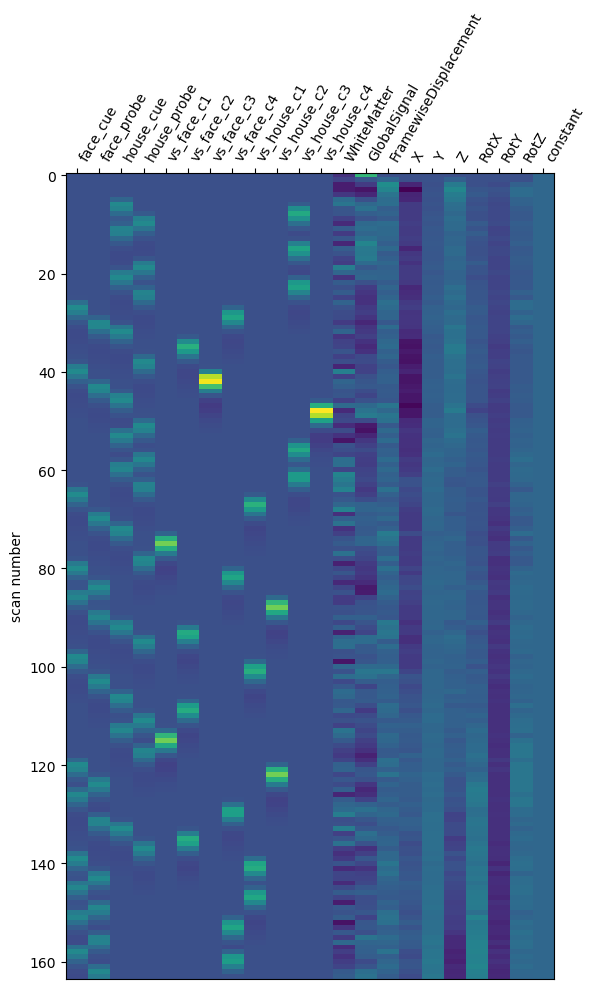

In [18]:
from nilearn.plotting import plot_design_matrix

# Obtain and plot design matrix
design_matrix = fmri_glm.design_matrices_[0]
plot_design_matrix(design_matrix)
plt.show()

In [19]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = dict([(column, contrast_matrix[i])
                        for i, column in enumerate(design_matrix.columns)])

In [20]:
basic_contrasts.keys()

dict_keys(['face_cue', 'face_probe', 'house_cue', 'house_probe', 'vs_face_c1', 'vs_face_c2', 'vs_face_c3', 'vs_face_c4', 'vs_house_c1', 'vs_house_c2', 'vs_house_c3', 'vs_house_c4', 'WhiteMatter', 'GlobalSignal', 'FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ', 'constant'])

In [21]:
basic_contrasts['face_cue'].shape

(22,)

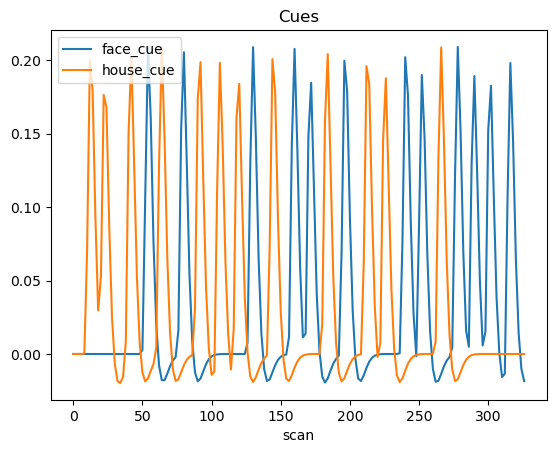

In [22]:
# Plot signals 
plt.plot(design_matrix['face_cue'], label='face_cue')
plt.plot(design_matrix['house_cue'], label='house_cue')
plt.xlabel('scan')
plt.title('Cues')
plt.legend(loc='upper left')
plt.show()


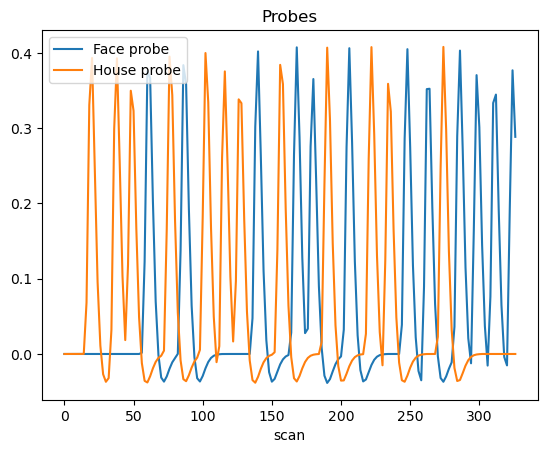

In [23]:
plt.plot(design_matrix['face_probe'], label='Face probe')
plt.plot(design_matrix['house_probe'], label='House probe')
plt.xlabel('scan')
plt.title('Probes')
plt.legend(loc='upper left')
plt.show()

In [24]:
#plt.plot(design_matrix['probe_face_c2'], label='probe_face_c2')
#plt.plot(design_matrix['probe_house_c2'], label='probe_house_c2')
#plt.xlabel('scan')
#plt.title('Probes C2')
#plt.legend(loc='upper left')
#plt.show()

In [25]:
#plt.plot(design_matrix['probe_face_c3'], label='probe_face_c3')
#plt.plot(design_matrix['probe_house_c3'], label='probe_house_c3')
#plt.xlabel('scan')
#plt.title('Probes C3')
#plt.legend(loc='upper left')
#plt.show()

In [26]:
#plt.plot(design_matrix['probe_face_c4'], label='probe_face_c4')
#plt.plot(design_matrix['probe_house_c4'], label='probe_house_c4')
#plt.xlabel('scan')
#plt.title('Probes C4')
#plt.legend(loc='upper left')
#plt.show()

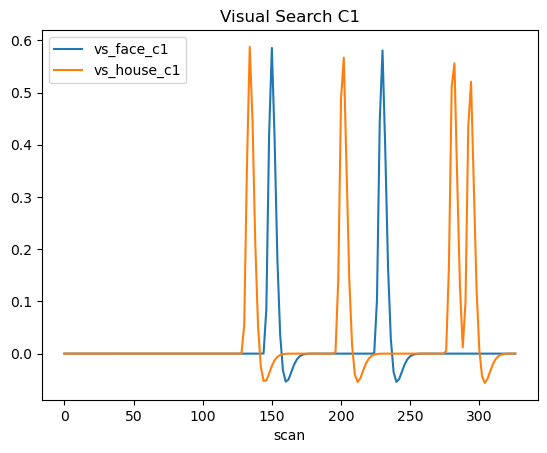

In [27]:
plt.plot(design_matrix['vs_face_c1'], label='vs_face_c1')
plt.plot(design_matrix['vs_house_c1'], label='vs_house_c1')
plt.xlabel('scan')
plt.title('Visual Search C1')
plt.legend(loc='upper left')
plt.show()

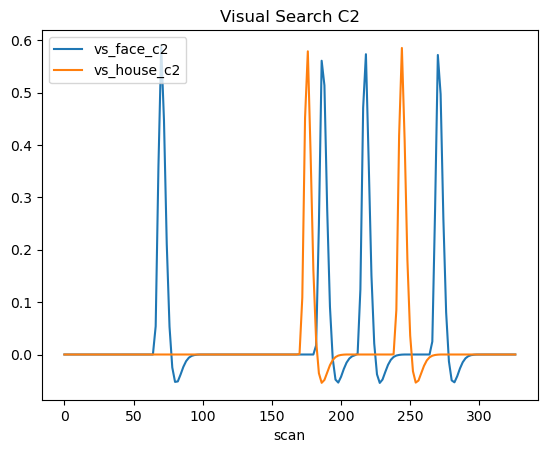

In [28]:
plt.plot(design_matrix['vs_face_c2'], label='vs_face_c2')
plt.plot(design_matrix['vs_house_c2'], label='vs_house_c2')
plt.xlabel('scan')
plt.title('Visual Search C2')
plt.legend(loc='upper left')
plt.show()

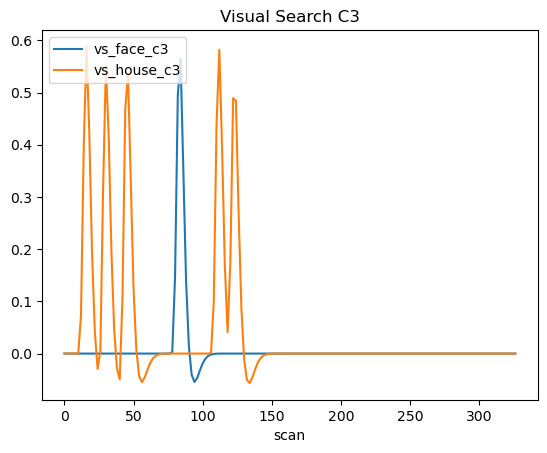

In [29]:
plt.plot(design_matrix['vs_face_c3'], label='vs_face_c3')
plt.plot(design_matrix['vs_house_c3'], label='vs_house_c3')
plt.xlabel('scan')
plt.title('Visual Search C3')
plt.legend(loc='upper left')
plt.show()

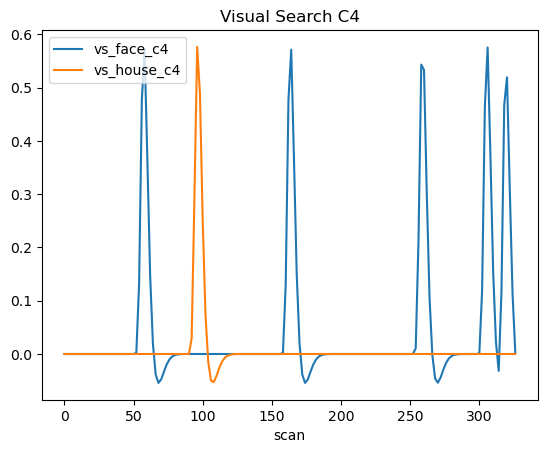

In [30]:
plt.plot(design_matrix['vs_face_c4'], label='vs_face_c4')
plt.plot(design_matrix['vs_house_c4'], label='vs_house_c4')
plt.xlabel('scan')
plt.title('Visual Search C4')
plt.legend(loc='upper left')
plt.show()

## Ploting contrasts

In [31]:
def plot_contrast(contrast, title):
    
    # Get raw contrast activation
    z_map = fmri_glm.compute_contrast(contrast, output_type='z_score')
    
    # Get clean contrast and threshold to visualize results
    # Threshold: false discovery rate 5% w/ cluster > 8 voxels
    clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr', cluster_threshold=8)
    s_threshold = str(round(threshold, 1))
    
    # Plot contrast
    dim = ['x', 'y', 'z']
    for x in range(3):
    
        plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode=dim[x], cut_coords=8, black_bg=True,
              title=('' + title + ' (Z>' + s_threshold + '), fdr = .05')) 

### Face cue 

In [32]:
from nilearn.glm.thresholding import threshold_stats_img

# Get raw contrast activation
z_map = fmri_glm.compute_contrast('+face_cue -house_cue', output_type='z_score')

# Get clean contrast and threshold to visualize results
# Threshold: false discovery rate 5% w/ cluster > 8 voxels
clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr', cluster_threshold=5)
s_threshold = str(round(threshold, 1))

/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/glm/first_level/first_level.py:652: UserWarning: One contrast given, assuming it for all 8 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


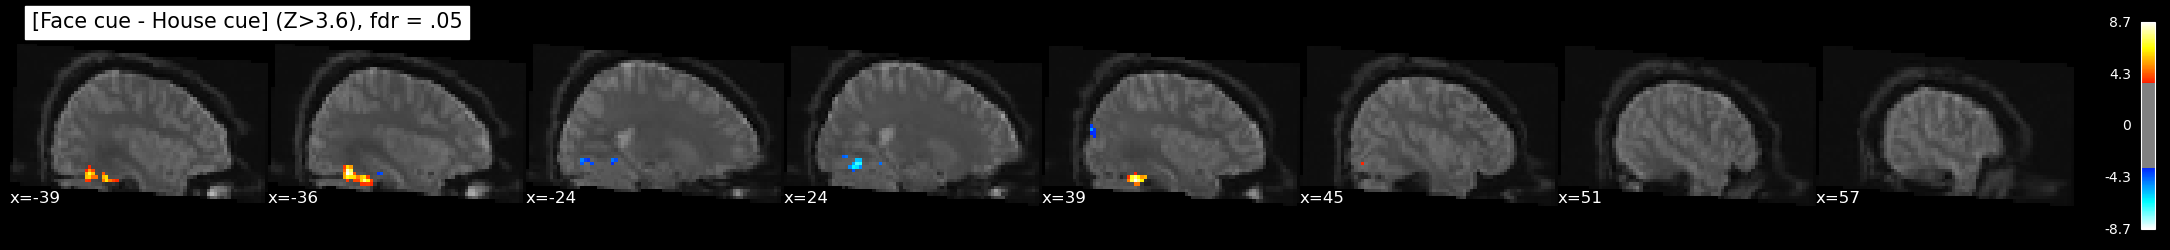

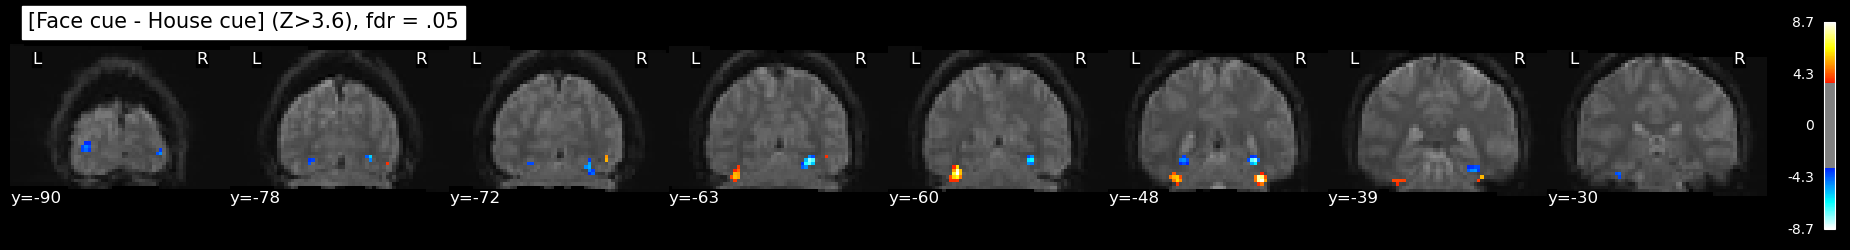

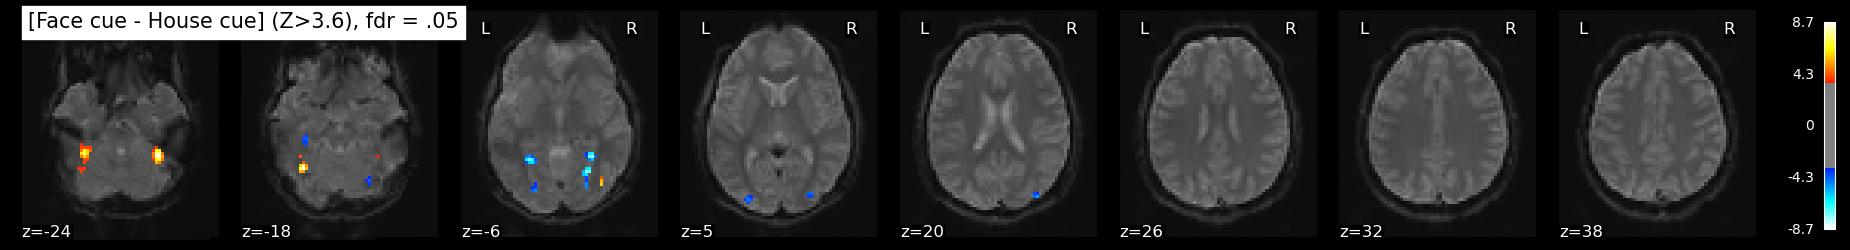

In [33]:
# Visualize results
dim = ['x', 'y', 'z']

for x in range(3):
    
    plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode=dim[x], cut_coords=8, black_bg=True,
              title=('[Face cue - House cue] (Z>' + s_threshold + '), fdr = .05')) 
    plt.show()

### House cue

In [34]:
# Get raw contrast activation
z_map = fmri_glm.compute_contrast('+house_cue -face_cue', output_type='z_score')

# Get clean contrast and threshold to visualize results
# Threshold: false discovery rate 5% w/ cluster > 8 voxels
clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr', cluster_threshold=5)
s_threshold = str(round(threshold, 1))

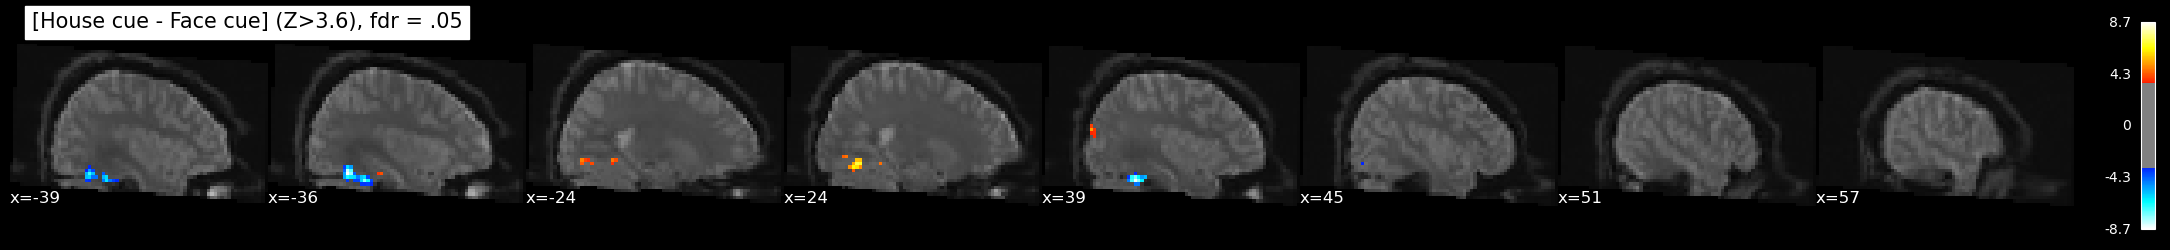

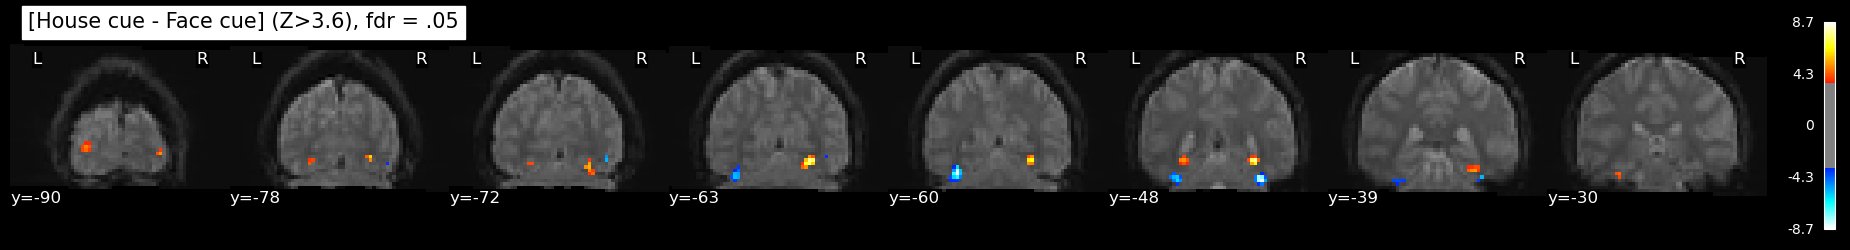

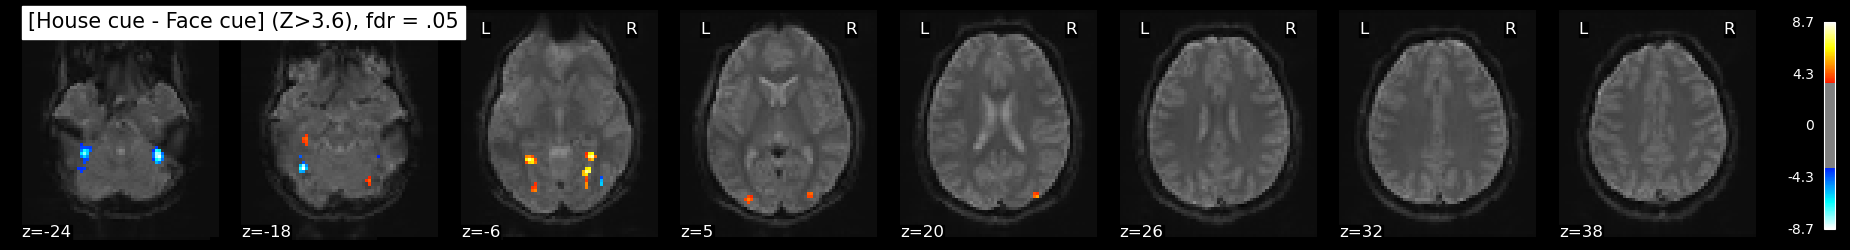

In [35]:
# Visualize results
dim = ['x', 'y', 'z']

for x in range(3):
    
    plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode=dim[x], cut_coords=8, black_bg=True,
              title=('[House cue - Face cue] (Z>' + s_threshold + '), fdr = .05'))
    plt.show()

### House probe

In [51]:
# Get raw contrast activation
z_map = fmri_glm.compute_contrast('+house_probe -face_probe', output_type='z_score')

# Get clean contrast and threshold to visualize results
# Threshold: false discovery rate 5% w/ cluster > 8 voxels
clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
s_threshold = str(round(threshold, 1))

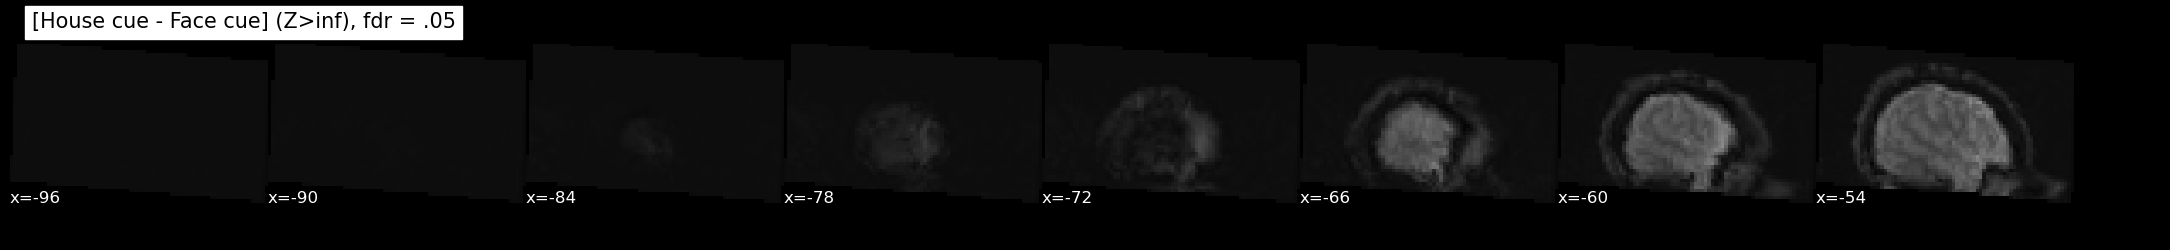

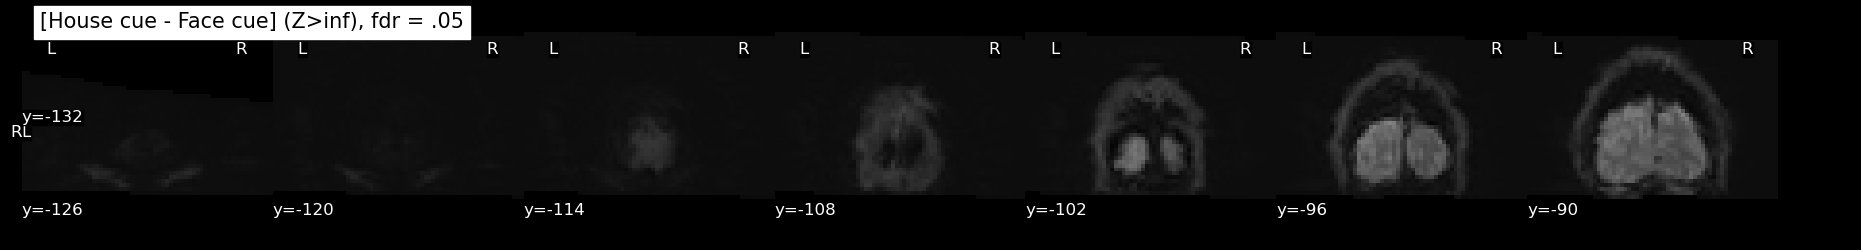

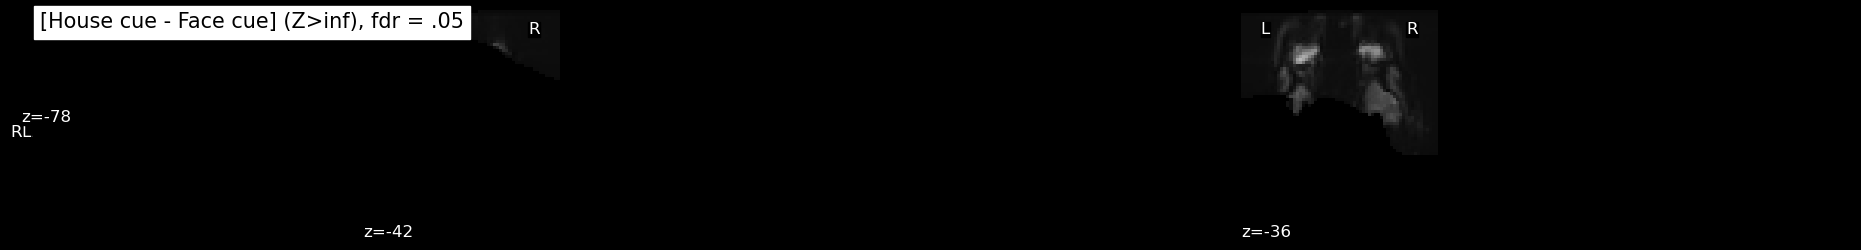

In [52]:
# Visualize results
dim = ['x', 'y', 'z']

for x in range(3):
    
    plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode=dim[x], cut_coords=8, black_bg=True,
              title=('[House cue - Face cue] (Z>' + s_threshold + '), fdr = .05'))
    plt.show()

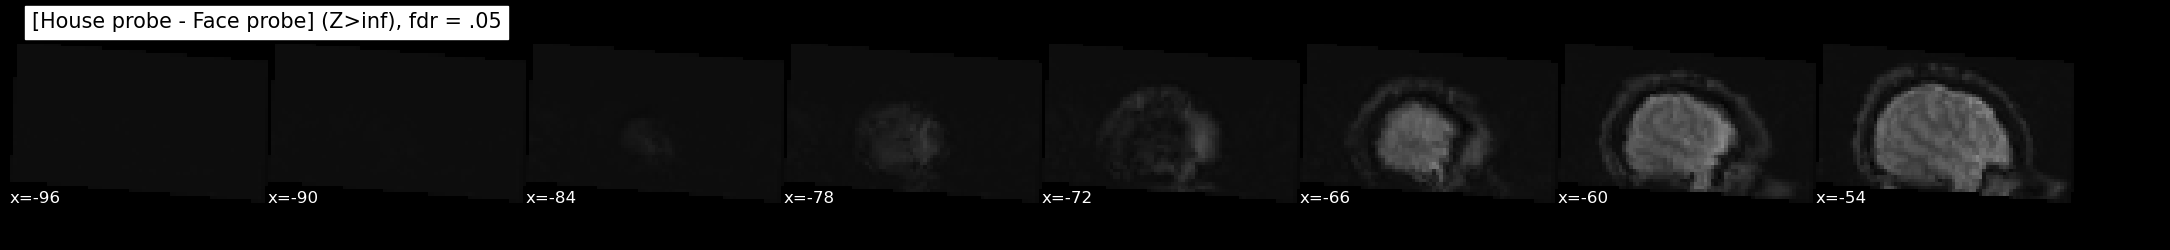

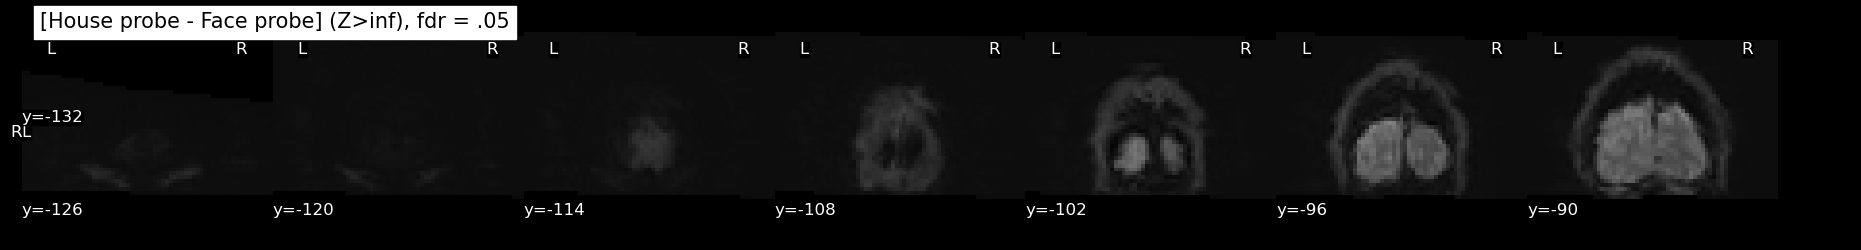

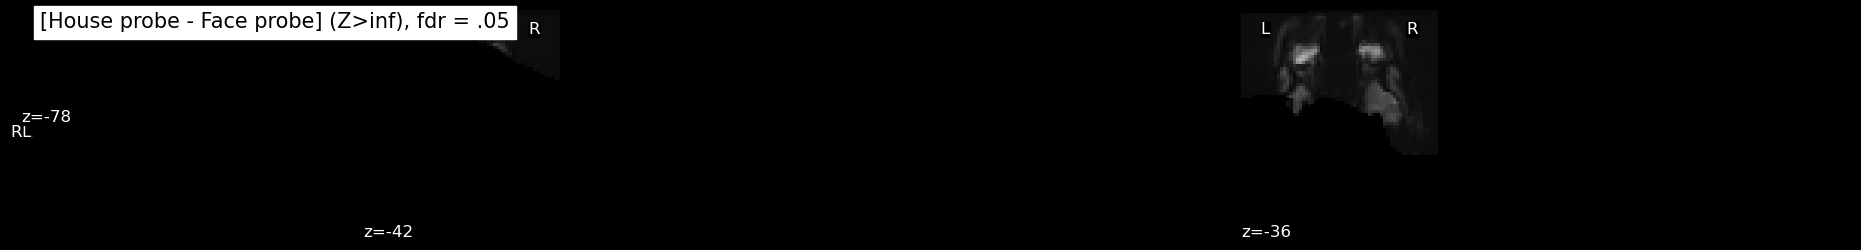

In [38]:
plot_contrast('+house_probe -face_probe', '[House probe - Face probe]')
plt.show()

### Face probe

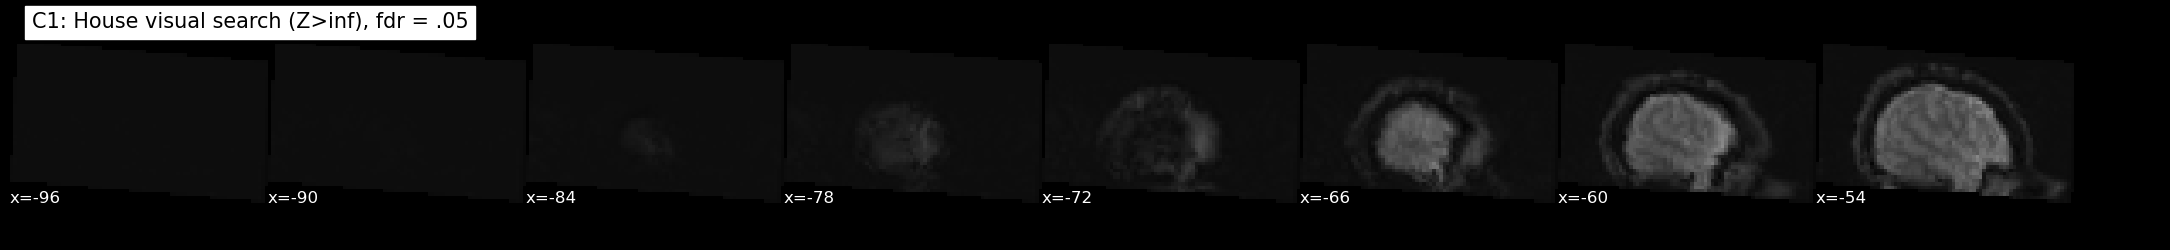

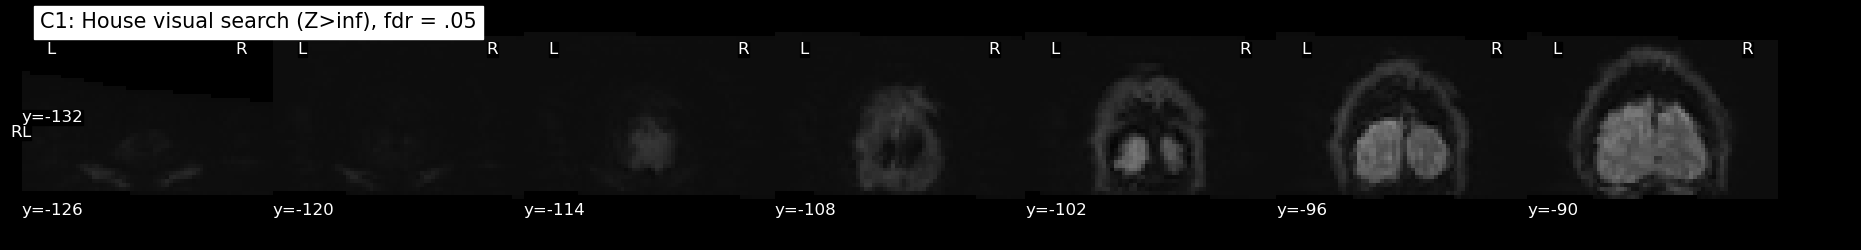

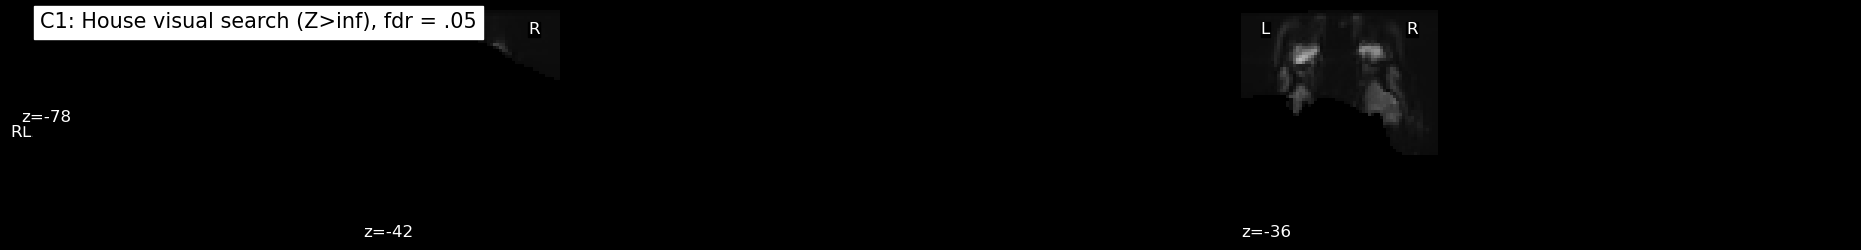

In [39]:
plot_contrast('+face_probe -house_probe', 'C1: House visual search')
plt.show()

### C1 (low interference, easy search): Visual search and probe

In [40]:
#plot_contrast('vs_face_c1', 'C1: Face visual search')
#plt.show()


In [41]:
# Visualize results
#dim = ['x', 'y', 'z']

#for x in range(3):
    
    #plot_stat_map(clean_map, bg_img=mean_img, threshold=3,
              #display_mode=dim[x], cut_coords=8, black_bg=True,
              #title=('House cue (Z>' + s_threshold + '), fdr = .05'))
    #plt.show()

In [42]:
plot_contrast('+vs_face_c1 -vs_house_c1', 'C1: House visual search')
plt.show()

UndefinedVariableError: name 'vs_face_c1' is not defined

In [ ]:
plot_contrast('probe_face_c1', 'C1: Face probe')
plt.show()

In [ ]:
#plot_contrast('probe_house_c1', 'C1: House probe')
#plt.show()

In [ ]:
"""
Weird that these contrasts ('probe_house_c1', 'vs_face_c1') is not running. Check if every run contained this condition. 
It might be that the error is generated because the condition is missing in some run.

"""

### C2 (low interference, hard search): Visual search and probe

In [ ]:
plot_contrast('vs_face_c2', 'C2: Face visual search')
plt.show()

In [ ]:
plot_contrast('vs_house_c2', 'C2: House visual search')
plt.show()

In [ ]:
plot_contrast('probe_face_c2', 'C2: Face probe')
plt.show()

In [ ]:
plot_contrast('probe_house_c2', 'C2: House probe')
plt.show()

### C3 (high interference, easy search): Visual search and probe

In [ ]:
plot_contrast('vs_face_c3', 'C3: Face visual search')
plt.show()

In [ ]:
plot_contrast('vs_house_c3', 'C3: House visual search')
plt.show()

In [ ]:
plot_contrast('probe_face_c3', 'C3: Face probe')
plt.show()

In [ ]:
plot_contrast('probe_house_c3', 'C3: House probe')
plt.show()

### C4 (high interference, hard search): Visual search and probe

In [ ]:
plot_contrast('vs_face_c4', 'C4: Face visual search')
plt.show()

In [ ]:
plot_contrast('vs_house_c4', 'C4: House visual search')
plt.show()

In [ ]:
plot_contrast('probe_face_c4', 'C4: Face probe')
plt.show()

In [ ]:
plot_contrast('probe_house_c4', 'C4: House probe')
plt.show()